In [7]:
import importlib
import time

In [8]:
DATA_DIR = "data/data_30min"

In [9]:
import data_prep
import plotting
import mathing
import ml_method

importlib.reload(data_prep)
importlib.reload(plotting)
importlib.reload(mathing)
importlib.reload(ml_method)

<module 'ml_method' from '/Users/hannesmoehring/Documents/Projekte/dev_fun/hypixel_bazaar/ml_method.py'>

In [10]:
raw_data = data_prep.load_all_json(DATA_DIR)

In [11]:
df = data_prep.init_dataframe(raw_data)
df_copy = df.copy()
df

,time,productId,inst_sellPrice,sellVolume,inst_sellPastWeek,sellOrders,inst_buyPrice,buyVolume,inst_buyPastWeek,buyOrders,datetime
0,08-05_05-20,INK_SACK:3,0.732890,3137214,76806336,51,4.403690e+00,5710227,27836662,100,2025-05-08 05:20:00
1,08-05_05-20,INK_SACK:4,2.600000,1515127,124943246,28,6.805934e+00,3250549,5808965,83,2025-05-08 05:20:00
2,08-05_05-20,CORRUPTED_BAIT,1.200141,139950,473112,4,9.840000e+01,146348,537680,119,2025-05-08 05:20:00
3,08-05_05-20,ENCHANTMENT_ULTIMATE_NO_PAIN_NO_GAIN_2,0.000000,0,10,0,1.000000e-01,32,191,16,2025-05-08 05:20:00
4,08-05_05-20,TARANTULA_WEB,959.947796,5632538,51422470,123,1.024354e+03,2457527,5438296,378,2025-05-08 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...
50111,07-05_23-50,ENCHANTMENT_TURBO_POTATO_1,3300.124242,1488,13529,18,1.196390e+04,397,3399,135,2025-05-07 23:50:00
50112,07-05_23-50,ENCHANTMENT_BANE_OF_ARTHROPODS_4,0.000000,0,0,0,0.000000e+00,0,0,0,2025-05-07 23:50:00
50113,07-05_23-50,ENCHANTMENT_ULTIMATE_WISDOM_3,571348.054545,223,139,18,1.149258e+06,344,402,50,2025-05-07 23:50:00
50114,07-05_23-50,ENCHANTMENT_TURBO_POTATO_2,1.300000,564,72,4,1.295996e+05,21,56,19,2025-05-07 23:50:00


# Example Products
- ENCHANTED_OAK_LOG
- ENCHANTED_JUNGLE_LOG
- ENCHANTED_ACACIA_LOG

<module 'matplotlib.pyplot' from '/Users/hannesmoehring/Documents/Projekte/dev_fun/hypixel_bazaar/venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

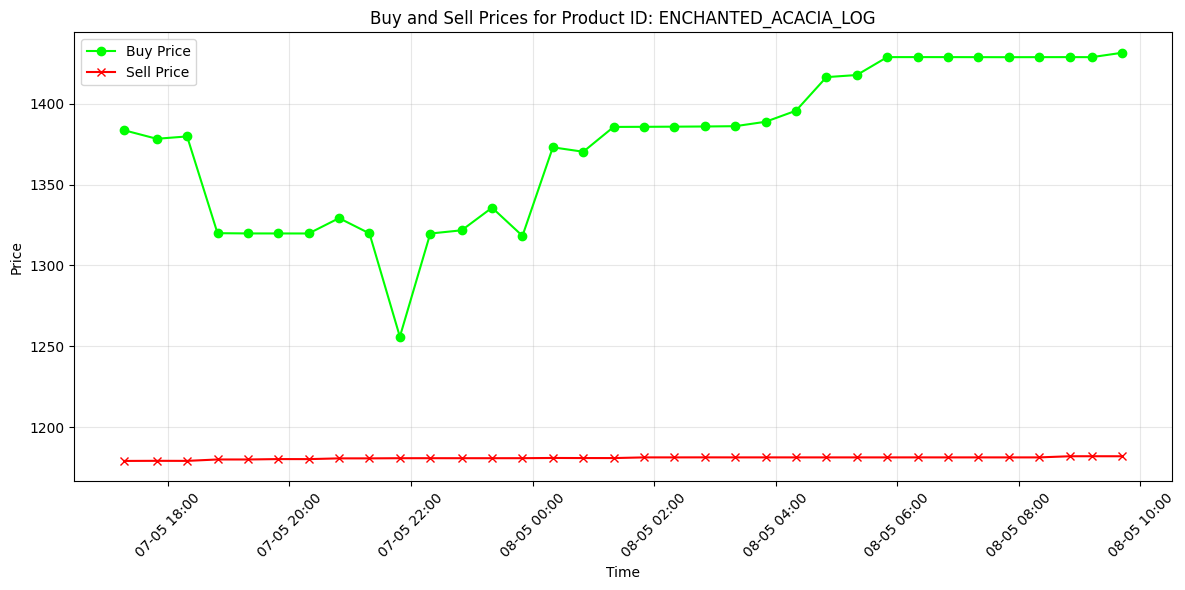

In [7]:
plotting.plot_product_prices(df,"ENCHANTED_ACACIA_LOG")

In [36]:
# mathing.fft_analysis(df, "ENCHANTED_ACACIA_LOG", "inst_buyPrice")

key_list = list(df["productId"].unique())
print(key_list)

temp_list: list[float] = []

for key in key_list:
    value, hours = mathing.fft_analysis(df, key, "inst_buyPrice")
    temp_list.append(value)

print(temp_list)

['INK_SACK:3', 'INK_SACK:4', 'CORRUPTED_BAIT', 'ENCHANTMENT_ULTIMATE_NO_PAIN_NO_GAIN_2', 'TARANTULA_WEB', 'ENCHANTMENT_ULTIMATE_NO_PAIN_NO_GAIN_1', 'DUNGEON_TRAP', 'DARK_ORB', 'ARCHITECT_FIRST_DRAFT', 'ENCHANTMENT_PROTECTION_7', 'ENCHANTMENT_PROTECTION_6', 'ESSENCE_DRAGON', 'RITUAL_RESIDUE', 'ENCHANTMENT_PROTECTION_1', 'GIANT_FRAGMENT_LASER', 'ENCHANTMENT_PROTECTION_5', 'ENCHANTED_MELON', 'ENCHANTMENT_PROTECTION_4', 'ENCHANTMENT_PROTECTION_3', 'ENCHANTMENT_PROTECTION_2', 'ENCHANTMENT_TURBO_COCO_1', 'ENCHANTMENT_TURBO_COCO_5', 'ENCHANTMENT_TURBO_COCO_4', 'ENCHANTMENT_TURBO_COCO_3', 'ENCHANTED_BLAZE_ROD', 'ENCHANTMENT_TURBO_COCO_2', 'ENCHANTED_BROWN_MUSHROOM', 'FRESHLY_MINTED_COINS', 'GOBLIN_EGG_YELLOW', 'PARTY_GIFT', 'ENCHANTED_GLISTERING_MELON', 'ENCHANTMENT_CORRUPTION_5', 'ENCHANTMENT_CORRUPTION_4', 'PROTECTOR_FRAGMENT', 'ENCHANTMENT_CORRUPTION_3', 'ENCHANTMENT_CORRUPTION_2', 'ENCHANTMENT_CORRUPTION_1', 'MAGMAG', 'ENCHANTED_MELON_BLOCK', 'ROCK_GEMSTONE', 'CONDENSED_FERMENTO', 'BEADY_E

/Users/hannesmoehring/Documents/Projekte/dev_fun/hypixel_bazaar/mathing.py:26: RuntimeWarning: invalid value encountered in scalar divide
  score: float = np.max(power_spectrum) / np.sum(


[np.float64(0.6323862020685099), np.float64(0.5911665907261535), np.float64(0.4330866596303994), np.float64(0.7843965769647951), np.float64(0.33907217598109457), np.float64(0.5038504279413635), np.float64(0.21722953873933937), np.float64(0.1401530162070349), np.float64(0.12564716301259138), np.float64(0.3379182073212425), np.float64(0.20418999753511657), np.float64(0.6239992814607342), np.float64(0.532924175224195), np.float64(nan), np.float64(0.37533400308022746), np.float64(nan), np.float64(0.5941218141199098), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(0.6214451440499896), np.float64(0.12049285007924297), np.float64(0.3471445459230639), np.float64(0.834326198826935), np.float64(0.3619154398056821), np.float64(0.4298804592774299), np.float64(0.2010179472723984), np.float64(0.5859577854771149), np.float64(0.593285600523961), np.float64(0.16372461372750927), np.float64(0.603633687683506), np.float64(0.7931718623563376), np.float64(0.12393527692401991), np.float64(0.3

# ML Method

22:46:19 - cmdstanpy - INFO - Chain [1] start processing
22:46:19 - cmdstanpy - INFO - Chain [1] done processing



 Plot for ENCHANTED_OAK_LOG

 Plot for BOOSTER_COOKIE


22:46:19 - cmdstanpy - INFO - Chain [1] start processing
22:46:19 - cmdstanpy - INFO - Chain [1] done processing
22:46:19 - cmdstanpy - INFO - Chain [1] start processing
22:46:19 - cmdstanpy - INFO - Chain [1] done processing
22:46:19 - cmdstanpy - INFO - Chain [1] start processing



 Plot for ENCHANTED_RAW_SALMON

 Plot for FUMING_POTATO_BOOK


22:46:19 - cmdstanpy - INFO - Chain [1] done processing


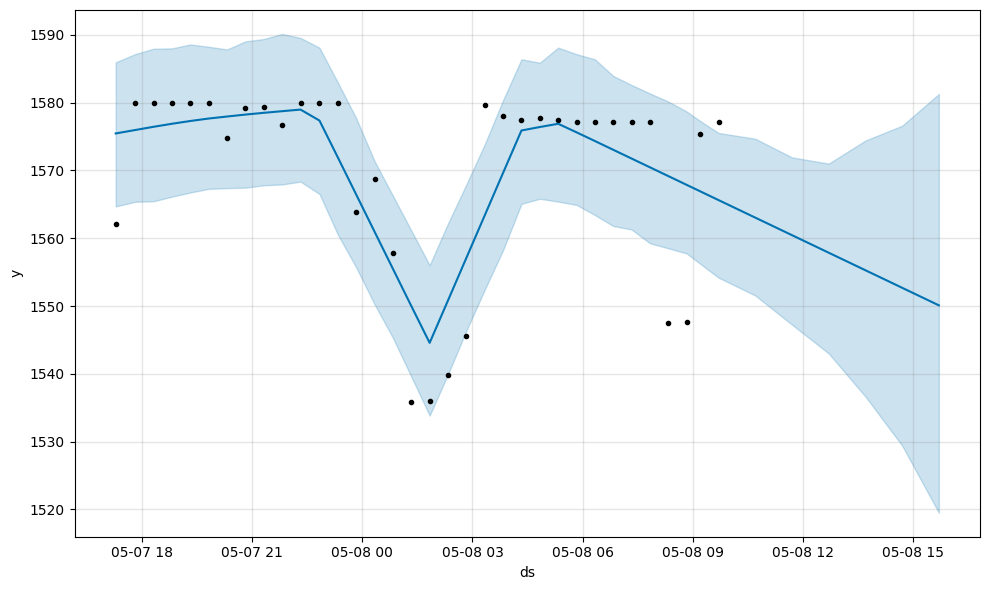

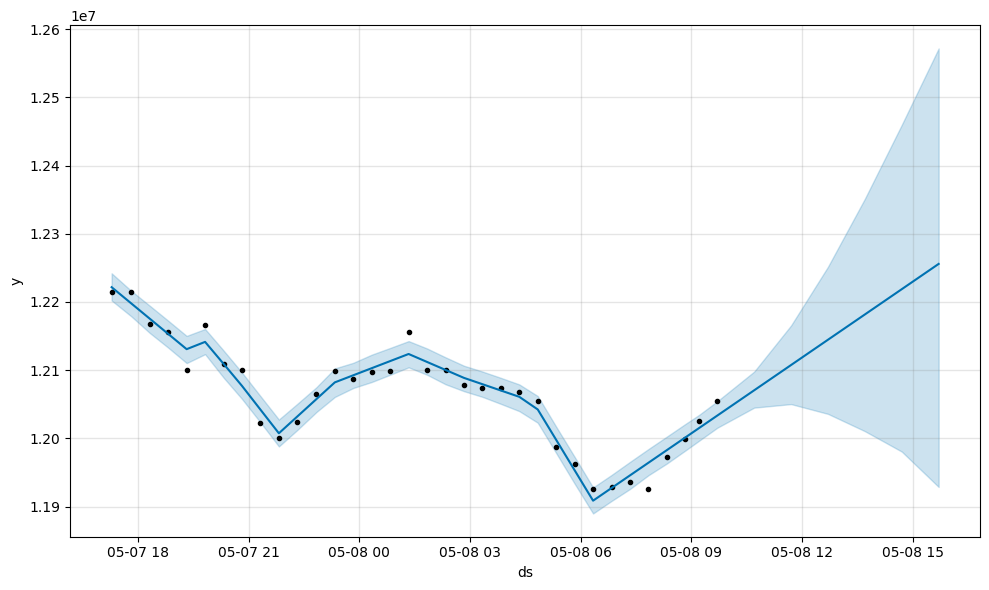

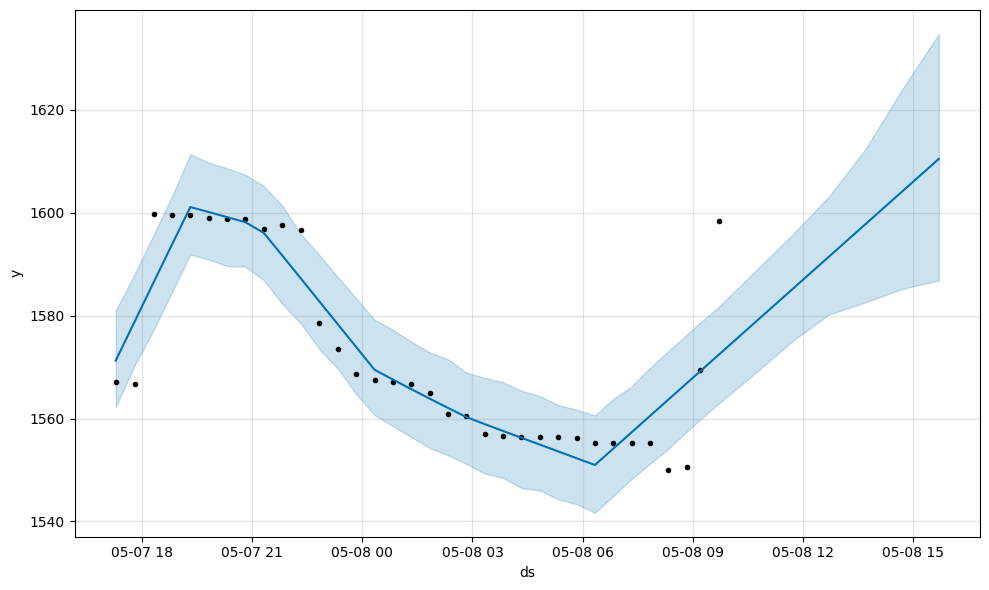

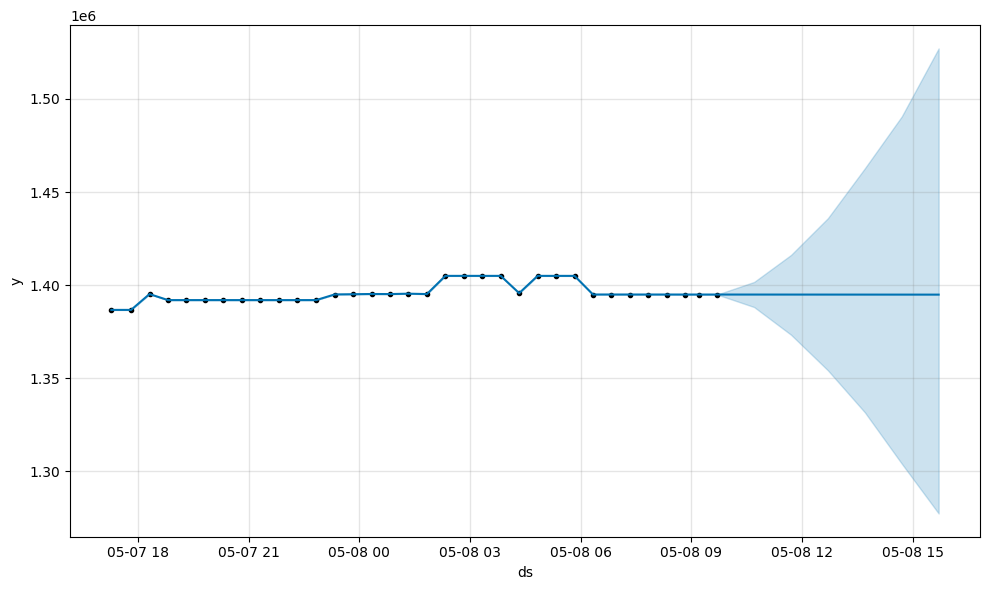

In [12]:
test_products: list[str] = ["ENCHANTED_OAK_LOG", "BOOSTER_COOKIE", "ENCHANTED_RAW_SALMON", "FUMING_POTATO_BOOK"]

for product in test_products:
    print("\n Plot for", product)
    ml_method.prophet_routine(df, product)
    